In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
img1 = Image.open(fp='test/data/1031280-4092-15376-[1 0 0 1].png')
img2 = Image.open(fp='test/data/1031280-4988-14480-[1 0 0 1].png')
img1 = T.ToTensor()(img1).unsqueeze(0)
img2 = T.ToTensor()(img2).unsqueeze(0)
img = torch.cat(tensors=(img1, img2), dim=0)
img = img.to(device)

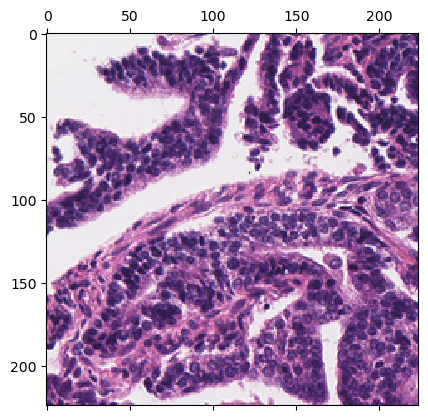

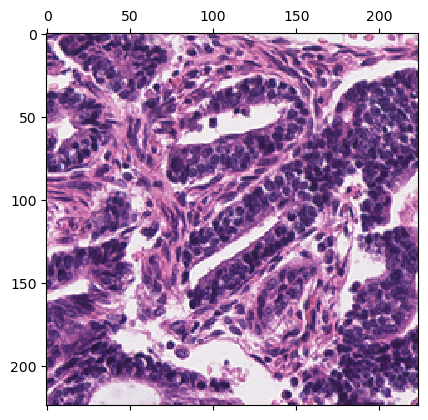

In [4]:
for j in range(img.size(0)):
    plt.matshow(img[j].moveaxis(0, -1).detach().cpu())
    plt.show()

In [5]:
from src.models.resnet50 import ResNet38ClassificationModel

In [6]:
model = ResNet38ClassificationModel()
model = model.to(device)

In [7]:
z = model(img)

In [ ]:
print(img.size())
plt.imshow(img[0].moveaxis(0, -1))
plt.show()
plt.imshow(img[1].moveaxis(0, -1))
plt.show()

In [ ]:
def unfold(x, kernel_size, stride):
    b, c , h, w = x.size()
    z = torch.zeros(size=(b, -1, 3, kernel_size, kernel_size))
    num_patches = h // stride

    for i in range(b):
        for j in range(num_patches):
            for k in range(num_patches):
                si = j * stride
                ei = si + kernel_size
                z[]

In [ ]:
fold(img)

In [ ]:
x = z.fold(1, 3, 3).fold(2, 112, 112).fold(3, 112, 112)

In [ ]:
z = z.reshape(-1, 3, 112, 112)

In [ ]:
plt.matshow(z[0, 0].moveaxis(0, -1))

In [ ]:
b = z.view(1, 3, 224, 224)

In [ ]:
plt.matshow(b[0].moveaxis(0, -1))